In [54]:
import pandas as pd

Para os próximos 3 exercícios, utilize os dados em `dados_ex1.pkl`, que contém Series
da quantidade de vendas diárias de um produto. Você pode ler esses dados da seguinte
forma:

vendas_diarias = pd.read_pickle('dados_ex1.pkl')

In [55]:
vendas_diarias = pd.read_pickle('dados_ex1.pkl').sort_index()

**Exercício 1:** Apresente:

a) O dia com o maior número de vendas e o valor correspondente

b) O dia com o menor número de vendas e o valor correspondente

c) O valor médio do número de vendas diárias no ano

d) O gráfico da quantidade de vendas diárias

Primeiro dia de maior venda = 2022-01-01 00:00:00. Vendas = 102
Primeiro dia de maior venda = 2022-06-05 00:00:00. Vendas = 114
nMedia diaria de vendas: 109.0


<Axes: title={'center': 'Vendas Diarias'}, xlabel='Mes', ylabel='Vendas'>

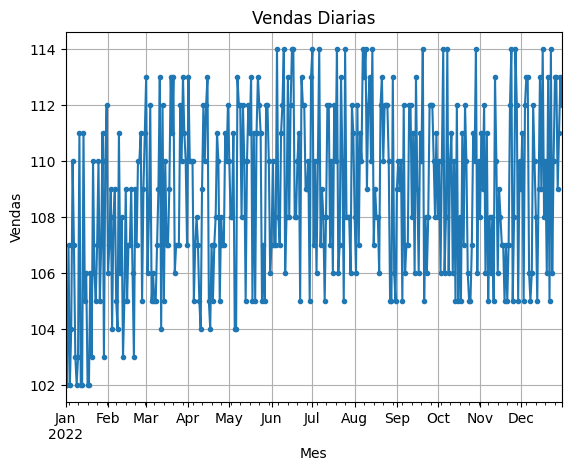

In [56]:
print(f'Primeiro dia de maior venda = {vendas_diarias.idxmin()}. Vendas = {vendas_diarias.min()}')
print(f'Primeiro dia de maior venda = {vendas_diarias.idxmax()}. Vendas = {vendas_diarias.max()}')
print(f'nMedia diaria de vendas: {vendas_diarias.mean().round()}')
vendas_diarias.plot(grid=True,marker='.', xlabel='Mes', ylabel='Vendas', title='Vendas Diarias')

**Exercício 2:** A partir da Series do Exercício 1, calcular a média de vendas mensais e
mostrar o gráfico com a média de vendas mensais. Dica: usar o método `resample()`. O
que você conclui em relação à variação do número de vendas desse produto ao longo do
ano?*texto em itálico*

<Axes: title={'center': 'Media de vendas por mes'}, xlabel='Mes', ylabel='Media de vendas'>

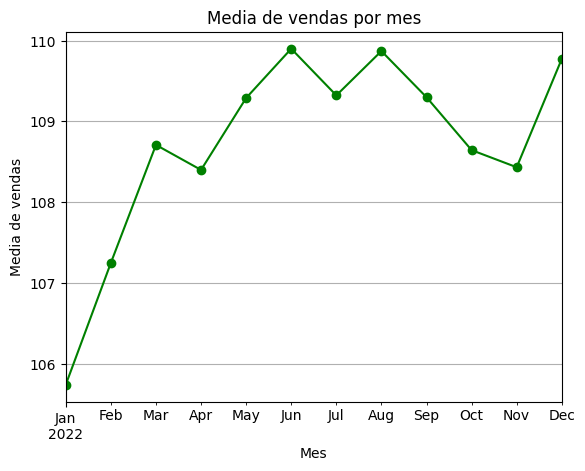

In [57]:
vendas_mensais = vendas_diarias.resample('M').mean()
vendas_mensais.plot(grid=True, marker='o', color='g', title='Media de vendas por mes',
                    xlabel='Mes', ylabel='Media de vendas')

**Exercício 3:** Apresente em uma tabela a variação porcentual mensal nas vendas.

In [58]:
percent_vendas = vendas_mensais.pct_change().apply(
    lambda x: '{:.1f}%'.format(x*100) if not pd.isna(x) else '---')
print(percent_vendas)

2022-01-31      ---
2022-02-28     1.4%
2022-03-31     1.4%
2022-04-30    -0.3%
2022-05-31     0.8%
2022-06-30     0.6%
2022-07-31    -0.5%
2022-08-31     0.5%
2022-09-30    -0.5%
2022-10-31    -0.6%
2022-11-30    -0.2%
2022-12-31     1.2%
Freq: M, dtype: object


**Exercício 4:** Explorando Transações Financeiras
Você foi contratado por uma empresa para realizar uma análise detalhada de suas transações financeiras ao
longo de um ano. Eles forneceram a você um conjunto de dados em formato CSV chamado transacoes.csv,
que contém informações sobre as transações diárias, incluindo data, produto, quantidade vendida e preço
unitário.
Sua tarefa é desenvolver em Python, utilizando a biblioteca Pandas, para realizar as seguintes operações:

1. Carregar os Dados: Carregar o conjunto de dados transacoes.csv em um DataFrame do Pandas, chamado
por exemplo df. Para setar a coluna de datas como sendo os índices do DataFrame:

In [59]:
transacoes = pd.read_csv('transacoes.csv')
transacoes['Data'] = pd.to_datetime(transacoes['Data'])
transacoes.set_index('Data', inplace=True)

2. Visualizar as Primeiras Linhas: Exibir as primeiras linhas do DataFrame para verificar a estrutura e os dados.

In [60]:
transacoes.head()

,Quantidade A,Preço Unitário A,Quantidade B,Preço Unitário B,Quantidade C,Preço Unitário C,Total
Data,,,,,,,
2022-01-01,3,110.0,11,105.0,5,57.0,NaN
2022-01-02,85,134.0,19,101.0,66,85.0,NaN
2022-01-03,91,142.0,20,103.0,21,87.0,NaN
2022-01-04,46,117.0,17,105.0,85,82.0,NaN
2022-01-05,30,107.0,52,94.0,30,59.0,NaN


3. Informações do DataFrame: Exibir informações sobre o DataFrame, como o tipo de dados de cada coluna e a
contagem de valores não nulos.

In [61]:
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quantidade A      365 non-null    int64  
 1   Preço Unitário A  365 non-null    float64
 2   Quantidade B      365 non-null    int64  
 3   Preço Unitário B  365 non-null    float64
 4   Quantidade C      365 non-null    int64  
 5   Preço Unitário C  365 non-null    float64
 6   Total             0 non-null      float64
dtypes: float64(4), int64(3)
memory usage: 22.8 KB


4. Resumo Estatístico: Gerar um resumo estatístico do DataFrame, incluindo contagem, média, desvio padrão,
mínimo, máximo e quartis das colunas numéricas.

In [62]:
transacoes.describe()

,Quantidade A,Preço Unitário A,Quantidade B,Preço Unitário B,Quantidade C,Preço Unitário C,Total
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,0.0
mean,49.994521,124.926027,49.912329,99.816438,50.578082,76.079452,NaN
std,28.774320,14.496400,28.538541,5.718848,28.440367,14.398059,NaN
min,1.000000,100.000000,1.000000,90.000000,1.000000,50.000000,NaN
25%,25.000000,113.000000,25.000000,95.000000,26.000000,63.000000,NaN
50%,50.000000,126.000000,50.000000,100.000000,51.000000,78.000000,NaN
75%,75.000000,138.000000,73.000000,105.000000,75.000000,89.000000,NaN
max,99.000000,149.000000,99.000000,109.000000,99.000000,99.000000,NaN


5. Apresentar um gráfico de área com os três produtos do qual é possível visualizar a venda total diária.

<Axes: xlabel='Data'>

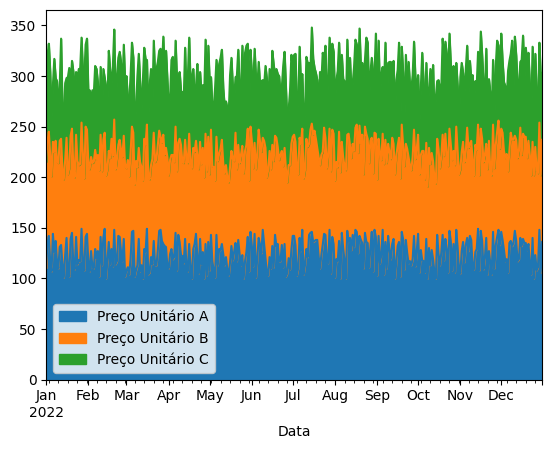

In [63]:
transacoes.drop(['Quantidade A', 'Quantidade B', 'Quantidade C', 'Total'], axis=1).plot.area()

6. Preencher a coluna 'Total' com o valor total de venda dos 3 produtos.

In [64]:
transacoes['Total'] = ((transacoes['Quantidade A']*transacoes['Preço Unitário A'])+
                     (transacoes['Quantidade B']*transacoes['Preço Unitário B'])+
                     transacoes['Quantidade C']*transacoes['Preço Unitário C'])
transacoes

,Quantidade A,Preço Unitário A,Quantidade B,Preço Unitário B,Quantidade C,Preço Unitário C,Total
Data,,,,,,,
2022-01-01,3,110.0,11,105.0,5,57.0,1770.0
2022-01-02,85,134.0,19,101.0,66,85.0,18919.0
2022-01-03,91,142.0,20,103.0,21,87.0,16809.0
2022-01-04,46,117.0,17,105.0,85,82.0,14137.0
2022-01-05,30,107.0,52,94.0,30,59.0,9868.0
...,...,...,...,...,...,...,...
2022-12-27,66,108.0,97,99.0,9,77.0,17424.0
2022-12-28,56,111.0,99,93.0,15,55.0,16248.0
2022-12-29,17,148.0,40,106.0,12,79.0,7704.0


7. Visualização de Vendas Mensais: Criar um gráfico de linha mostrando o total de vendas mensais ao longo do ano.

<Axes: title={'center': 'Total de vendas mensais, R$'}, xlabel='Data'>

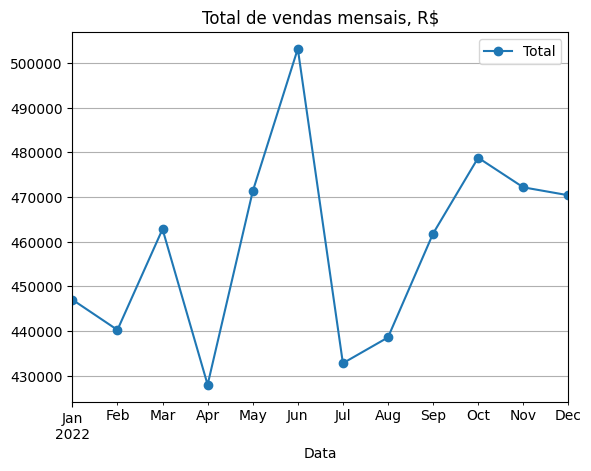

In [65]:
tvendas_mensais = transacoes.resample('M').sum()
tvendas_mensais['Total'].plot(marker='o', grid=True, title='Total de vendas mensais, R$', legend='Total de vendas')

8. Visualização das distribuições dos preços de cada produto: Criar um gráfico de caixa (boxplot) para o preço
unitário de cada produto em um mesmo gráfico para auxiliar na comparação entre os produtos.

<Axes: title={'center': 'Distribuição das Vendas por Produto'}, xlabel='Produto', ylabel='Preços Unitários, R$'>

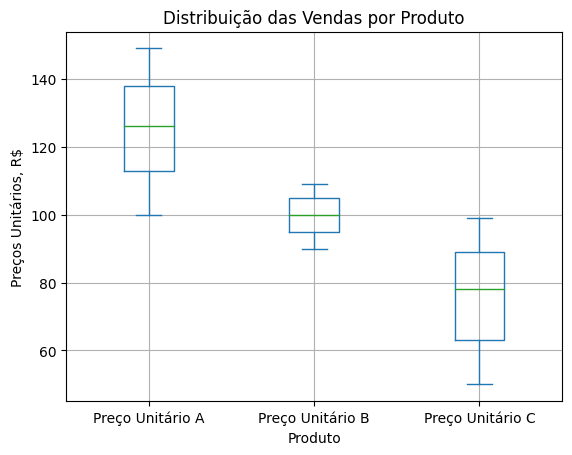

In [66]:
transacoes.drop(['Quantidade A', 'Quantidade B', 'Quantidade C', 'Total'], axis=1).plot.box(
    title='Distribuição das Vendas por Produto', xlabel='Produto', ylabel='Preços Unitários, R$', grid=True
)

9. Salvar os Dados Trabalhados: Salvar os dados trabalhados, agora com a coluna 'Total' preenchida em um novo
arquivo CSV chamado *transacoes_trabalhadas.csv*.

**Exercício 5:** Suponha que você é um cientista de dados em uma empresa de comércio eletrônico que vende
produtos em diferentes países. A empresa está interessada em entender a distribuição de vendas de diferentes
categorias de produtos em relação aos países de venda.

1. Dados de entrada:

• Você tem um DataFrame chamado df_vendas (definido na próxima página) que contém informações sobre
vendas de produtos, incluindo o ID do produto, a categoria do produto e o país de venda. Cada linha do
DataFrame corresponde a uma venda do produto com o ID correspondente.

• O DataFrame tem as seguintes colunas: 'ID Produto', 'Categoria', 'País'.

In [67]:
transacoes.to_csv('transacoes_trabalhadas.csv', index=True)

In [68]:
df_vendas = pd.DataFrame({
'ID Produto': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
'Categoria': ['Eletronicos', 'Roupas', 'Eletronicos', 'Roupas',
'Acessorios', 'Acessorios', 'Eletronicos', 'Roupas',
'Eletronicos', 'Roupas'],
'Pais': ['Brasil', 'Argentina', 'Uruguai', 'Brasil', 'Argentina',
'Uruguai', 'Brasil', 'Argentina', 'Uruguai', 'Brasil']})

2. Tarefa:
Use o método crosstab do Pandas para calcular uma tabela de frequência que mostre a distribuição de vendas de
produtos por categoria e por país.

3. Saída esperada:
Uma tabela de frequência que mostra quantas vendas ocorreram para cada categoria de produto em cada país.

In [69]:
pd.crosstab(df_vendas['Categoria'], df_vendas['Pais'])

Pais,Argentina,Brasil,Uruguai
Categoria,,,
Acessorios,1,0,1
Eletronicos,0,2,2
Roupas,2,2,0


**Exercício 6:** Dados IBGE 2021

Responda às perguntas referentes aos 100 municípios com maior PIB do Brasil no arquivo: ibge-pib_municipios-2021.csv

In [70]:
ibge = pd.read_csv('ibge-pib_municipios-2021.csv', sep=';')

,Município,UF,Região,PIB (1000 R$),Participação PIB Brasil (%)
0,São Paulo,SP,Sudeste,828980608,9.20
1,Rio de Janeiro,RJ,Sudeste,359634753,3.99
2,Brasília,DF,Centro-Oeste,286943782,3.18
3,Belo Horizonte,MG,Sudeste,105829675,1.17
4,Manaus,AM,Norte,103281436,1.15


1. Quais os 10 municípios com maior PIB?

In [71]:
ibge[['Município','PIB (1000 R$)']].sort_values(by=['PIB (1000 R$)'], ascending=False).head(10)

,Município,PIB (1000 R$)
0,São Paulo,828980608
1,Rio de Janeiro,359634753
2,Brasília,286943782
3,Belo Horizonte,105829675
4,Manaus,103281436
5,Curitiba,98003704
6,Osasco,86111260
7,Maricá,85814296
8,Porto Alegre,81562848
9,Guarulhos,77376467


2. Qual a porcentagem do PIB dos primeiros 20 municípios com maior PIB em relação ao total do PIB dos 100 municípios
apresentados?

In [72]:
vinte = ibge['PIB (1000 R$)'].sort_values(ascending=False).head(20).sum()
total = ibge['PIB (1000 R$)'].sum() #Dava para ter feito de outro jeito, demorei para perceber que o Brasil tem
print(f'Os 20 maiores PIBs constituem {100*vinte/total:.2f}% do PIB total da lista de municípios.') #mais de 100 municípios

Os 20 maiores PIBs constituem 58.07% do PIB total da lista de municípios.


3. Apresente uma tabela com o número de municípios por estado.

In [79]:
ibge.groupby('UF').size().reset_index(name='Quantidade de Municípios')

,UF,Quantidade de Municípios
0,AL,1
1,AM,1
2,BA,3
3,CE,1
4,DF,1
5,ES,3
6,GO,4
7,MA,1
8,MG,9
9,MS,1


4. Apresente uma tabela com o número de municípios por região.

In [74]:
porRegiao = ibge.groupby('Região').size().reset_index()
porRegiao.columns = ['Região', 'Quantidade']
porRegiao

,Região,Quantidade
0,Centro-Oeste,8
1,Nordeste,13
2,Norte,5
3,Sudeste,59
4,Sul,15


5. Apresente um gráfico que revele o número ou proporção de municípios por região.

<Axes: title={'center': 'Número de Municípios por Região'}, xlabel='Região'>

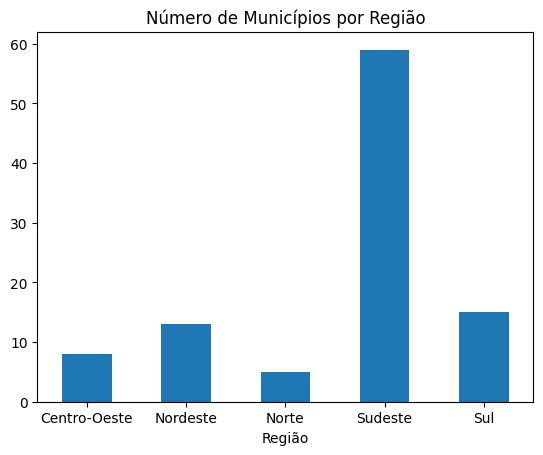

In [75]:
porRegiao.plot.bar(
    x = 'Região',
    y = 'Quantidade',
    title = 'Número de Municípios por Região',
    rot = 0,
    legend = None
)

<Axes: title={'center': 'Municípios por região'}>

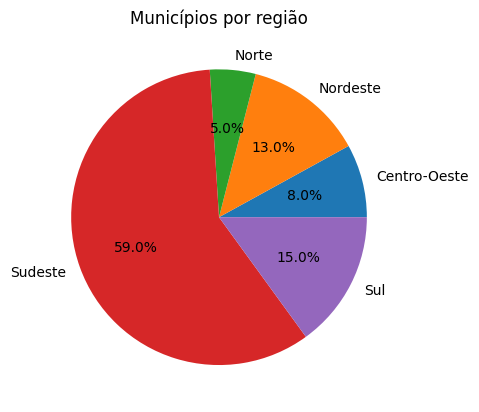

In [76]:
porRegiao['Quantidade'].plot.pie(
    labels = porRegiao['Região'],
    ylabel = '',
    title = 'Municípios por região',
    autopct='%1.1f%%',
    legend = None)

6. Apresente um gráfico que revele a proporção de cada região do país em relação ao PIB total dos 100 municípios.

<Axes: title={'center': 'Proporção do PIB por região'}>

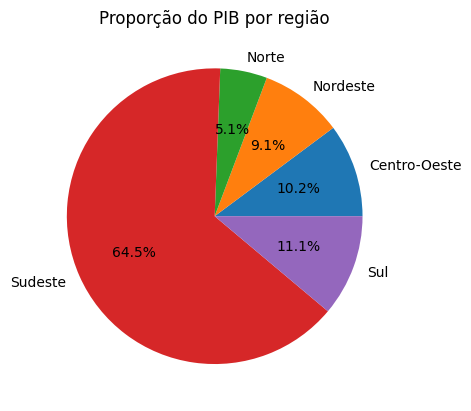

In [77]:
propPIB = ibge[['Região', 'PIB (1000 R$)']].groupby('Região').sum().div(ibge['PIB (1000 R$)'].sum()).reset_index()
propPIB.columns = ['Região', 'Região / Total']
propPIB['Região / Total'].plot.pie(
    labels = propPIB['Região'],
    ylabel = '',
    title = 'Proporção do PIB por região',
    autopct='%1.1f%%',
    legend = None
)

7. Apresente um novo gráfico ou nova figura ou nova tabela que você julgar interessante sobre os dados. Por exemplo, que
revele a proporção desses 100 municípios em relação ao PIB total do Brasil (precisará usar a informação da coluna
'Participação PIB Brasil (%)’.

<Axes: title={'center': 'Proporção do PIB por região'}>

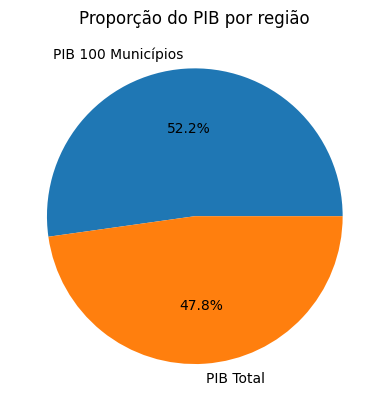

In [78]:
pibMunicipios = ibge['Participação PIB Brasil (%)'].sum()
pibs = pd.DataFrame(
    {'Tipo': ['PIB 100 Municípios', 'PIB Total'],
        'Valores': [pibMunicipios, 100 - pibMunicipios]}
)
pibs['Valores'].plot.pie(
    labels = pibs['Tipo'],
    ylabel = '',
    title = 'Proporção do PIB por região',
    autopct='%1.1f%%',
    legend = None
)